In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
from random import shuffle

In [2]:
base_dir = './Data/Traffic/'
print(len(os.listdir(base_dir)))

2112


In [3]:
split = 0.8 
split = int(split*len(os.listdir(base_dir)))
print(split)

1689


In [4]:
list_img = os.listdir(base_dir)
print(len(list_img))
shuffle(list_img)

2112


In [5]:
training_data = []
for i in list_img:
    if 'Traffic' in i:
        img_path = base_dir + i
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = np.reshape(img, (128, 128, 1))
        training_data.append([img, np.array([1,0])])
    elif 'NoTraf' in i:
        img_path = base_dir + i
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = np.reshape(img, (128, 128, 1))
        training_data.append([img, np.array([0,1])])
training_data = np.asarray(training_data)
print(training_data.shape)

(2112, 2)


[1 0]


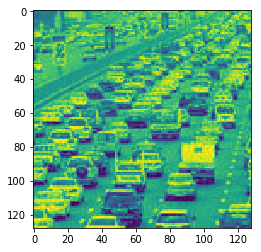

[1 0]


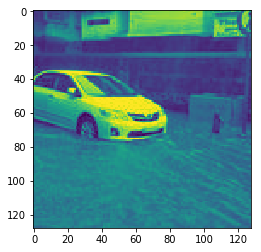

[1 0]


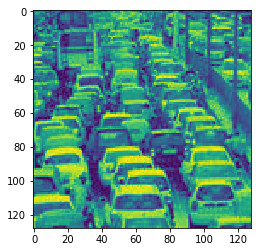

[1 0]


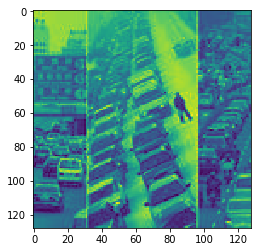

[1 0]


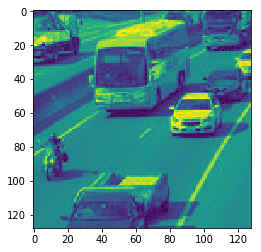

[0 1]


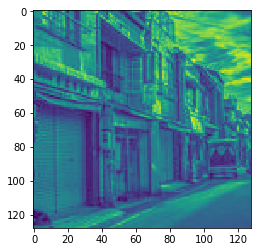

[1 0]


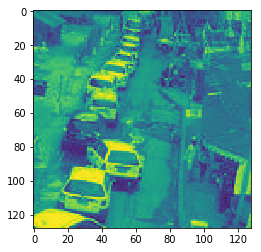

[1 0]


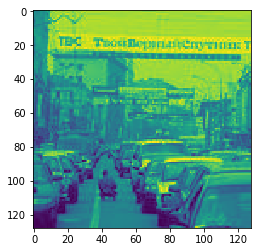

[0 1]


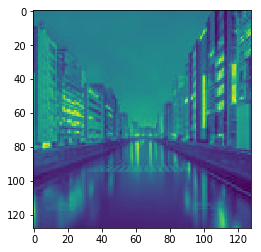

[1 0]


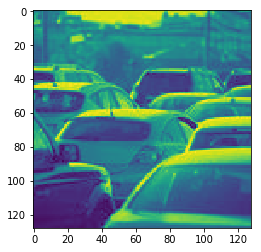

In [6]:
def print_sample():
    for i in range(10):
        img = training_data[i][0]
        img = np.reshape(img, (128, 128))
        label = training_data[i][1]
        print(label)
        plt.imshow(img)
        plt.show()
print_sample()

In [98]:
np.save('training_data.npy', training_data)


(2112, 2)


In [7]:
import tensorflow as tf

In [8]:

x = tf.placeholder(tf.float32, shape=[None, 128, 128, 1])
y_true = tf.placeholder(tf.float32, shape=[None, 2])

In [9]:
y_true_cls = tf.argmax(y_true, axis=1)

In [10]:
conv_1 = tf.layers.conv2d(inputs=x, kernel_size=5, filters=16, padding='same', activation=tf.nn.relu)
conv_1

<tf.Tensor 'conv2d/Relu:0' shape=(?, 128, 128, 16) dtype=float32>

In [11]:
max_pool_1 = tf.layers.max_pooling2d(inputs=conv_1, pool_size=2, strides=2)
max_pool_1

<tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 64, 64, 16) dtype=float32>

In [12]:
conv_2 = tf.layers.conv2d(inputs=max_pool_1, kernel_size=5, filters=32, padding='same', activation=tf.nn.relu)
conv_2

<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 64, 64, 32) dtype=float32>

In [13]:
max_pool_2 = tf.layers.max_pooling2d(inputs=conv_2, pool_size=2, strides=2)
max_pool_2

<tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 32, 32, 32) dtype=float32>

In [14]:
conv_3 = tf.layers.conv2d(inputs=max_pool_2, kernel_size=5, filters=64, padding='same', activation=tf.nn.relu)
conv_3

<tf.Tensor 'conv2d_2/Relu:0' shape=(?, 32, 32, 64) dtype=float32>

In [15]:
max_pool_3 = tf.layers.max_pooling2d(inputs=conv_3, pool_size=2, strides=2)
max_pool_3

<tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 16, 16, 64) dtype=float32>

In [16]:
conv_4 = tf.layers.conv2d(inputs=max_pool_3, kernel_size=5, filters=32, padding='same', activation=tf.nn.relu)
conv_4

<tf.Tensor 'conv2d_3/Relu:0' shape=(?, 16, 16, 32) dtype=float32>

In [17]:
max_pool_4 = tf.layers.max_pooling2d(inputs=conv_4, pool_size=2, strides=2)
max_pool_4

<tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 8, 8, 32) dtype=float32>

In [18]:
flat = tf.layers.flatten(inputs=max_pool_4)
flat

<tf.Tensor 'flatten/Reshape:0' shape=(?, 2048) dtype=float32>

In [19]:
dense_1 = tf.layers.dense(inputs=flat, units=512, activation=tf.nn.relu)
dense_1

<tf.Tensor 'dense/Relu:0' shape=(?, 512) dtype=float32>

In [20]:
dense_2 = tf.layers.dense(inputs=dense_1, units=128, activation=tf.nn.relu)
dense_2

<tf.Tensor 'dense_1/Relu:0' shape=(?, 128) dtype=float32>

In [21]:
dense_3 = tf.layers.dense(inputs=dense_2, units=2, activation=None)
dense_3

<tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 2) dtype=float32>

In [85]:
y_pred = tf.nn.softmax(logits=dense_3)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [23]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=dense_3)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [25]:
session = tf.Session()

In [26]:
session.run(tf.global_variables_initializer())
tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


<tf.Operation 'init_1' type=NoOp>

In [27]:
saver = tf.train.Saver()

In [75]:
epochs = 10

In [78]:
for i in range(epochs):
    for i in range(20):
        x_train = []
        y_train = []
        for i in range(i*100, (i*100)+100):
            x_train.append(training_data[i][0])
            y_train.append(training_data[i][1])
        x_train = np.asarray(x_train)
        y_train = np.asarray(y_train)
        X = x_train
        Y = y_train
        feed_dict = {x:X, y_true:Y}
        session.run(optimizer, feed_dict=feed_dict)
    print('Epoch!!!!!!!!')

Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!
Epoch!!!!!!!!


(100, 128, 128, 1) (100, 2)
Empty


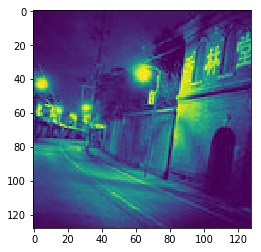

Traffic


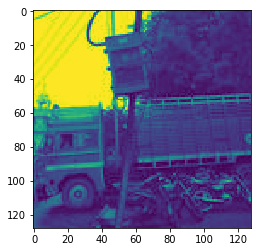

Empty


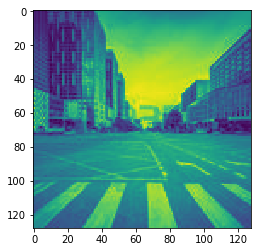

Traffic


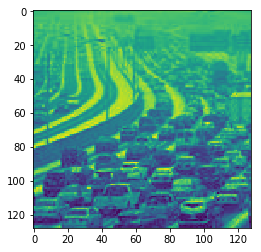

Traffic


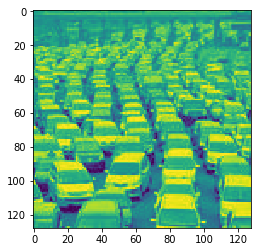

Empty


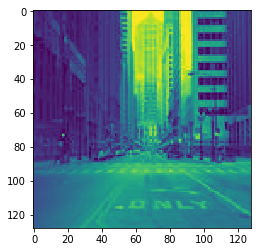

Traffic


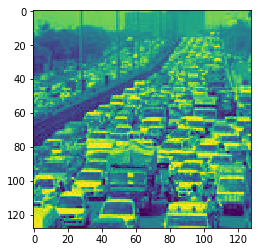

Traffic


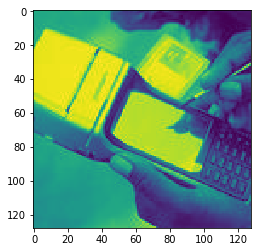

Traffic


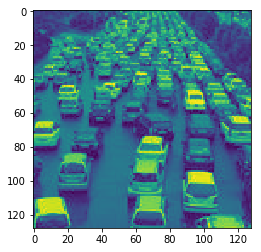

Empty


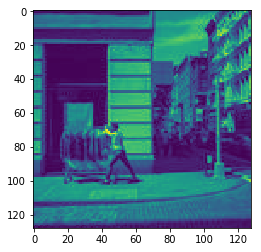

In [89]:
from numpy import random
random_batch_x = []
random_batch_y = []
for i in range(100):
    rand_num = random.randint(0,2000)
    random_batch_x.append(training_data[rand_num][0])
    random_batch_y.append(training_data[rand_num][1])
random_batch_x = np.asarray(random_batch_x)
random_batch_y = np.asarray(random_batch_y)
print(random_batch_x.shape, random_batch_y.shape)

feed_dict = {x:random_batch_x, y_true:random_batch_y}
y_pred1 = session.run(y_pred_cls, feed_dict=feed_dict)
for i in range(10):
    img = random_batch_x[i]
    img = np.reshape(img, (128, 128))
    if y_pred1[i] == 0:
        print('Traffic')
    else:
        print('Empty')
    plt.imshow(img)
    plt.show()
    

In [79]:
session.run(accuracy, feed_dict=feed_dict)

0.99000001

In [90]:
save_path = './checkpoints/model-best'

In [91]:
saver.save(sess=session, save_path=save_path)

'./checkpoints/model-best'

In [94]:
session.run(tf.global_variables_initializer())

In [95]:
session.run(accuracy, feed_dict=feed_dict)

0.72000003

In [96]:
saver.restore(save_path=save_path, sess=session)

INFO:tensorflow:Restoring parameters from ./checkpoints/model-best


In [97]:
session.run(accuracy, feed_dict=feed_dict)

0.98000002